# DS 3000 - Assignment 8

**Student Name**: Julia Knopp

**Date**: October 24, 2023


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Loading Data (50 pts)

The Organization for Economic Co-operation and Development (OECD) publishes data on the annual meat consumption for several countries. The data contains indicators for: beef and veal, pig, poultry, and sheep; and their consumption is measured in thousand tonnes of carcass weight and kilograms of retail weight per capita.

Write python code to answer the questions below and ensure that you round all numeric calculations to 2 decimal places. 

## Question 1: 

(0 pts) Load the data directly from the URL. Ensure that you inspect the data, so that you know how to identify the necessary columns.


In [2]:
# read the csv file and load into a dataframe
df = pd.read_csv('DP_LIVE_22102023212548732.csv')

# remove the 'Flag Codes' column since it only contains NaN values
df = df.drop('Flag Codes', axis=1)

# get the info of the dataframe
df.info()

# print some of the dataframe to examine
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 0 to 12159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   12160 non-null  object 
 1   INDICATOR  12160 non-null  object 
 2   SUBJECT    12160 non-null  object 
 3   MEASURE    12160 non-null  object 
 4   FREQUENCY  12160 non-null  object 
 5   TIME       12160 non-null  int64  
 6   Value      12160 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 665.1+ KB


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.405
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.370
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.662


## Question 2: 
(10 pts) Extract the meat consumption data for any two countries of your choice and evaluate the patterns and trends in their meat consumption. You can explore any (2) types of meat (from the chosen countries), and you only need to select one unit of measurement**. Ensure that you visualize the data and explain your findings.

Text(0, 0.5, 'Carcass Weight (in killograms per capita)')

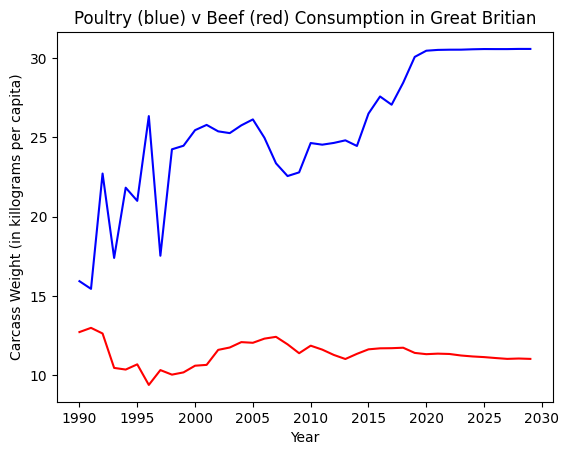

In [3]:
# create a new dataframe containing the data for Great Britian
gbr_df = df[df['LOCATION'] == 'GBR']

# use the kilograms measurement
sample_kgs = gbr_df[gbr_df['MEASURE'] == 'KG_CAP']

# get the poultry consumption for Great Britian
sample_poultry = sample_kgs[sample_kgs['SUBJECT'] == 'POULTRY'][['TIME', 'Value']]

# get the beef consumption for Great Britian
sample_beef = sample_kgs[sample_kgs['SUBJECT'] == 'BEEF'][['TIME', 'Value']]

# create line charts to examine the consumption of these meats over time
plt.plot(sample_poultry['TIME'], sample_poultry['Value'], label='Poultry', color='blue') 
plt.plot(sample_beef['TIME'], sample_beef['Value'], label='Beef', color='red') 

# give the plot a title
plt.title('Poultry (blue) v Beef (red) Consumption in Great Britian')
# label the x axis
plt.xlabel('Year')
# label the y axis
plt.ylabel('Carcass Weight (in killograms per capita)')

Text(0, 0.5, 'Carcass Weight (in killograms per capita)')

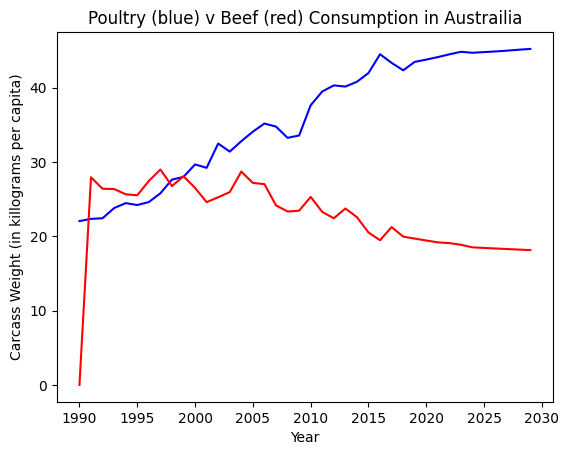

In [4]:
# create a new dataframe containing the data for Austrailia
aus_df = df[df['LOCATION'] == 'AUS']

# use the kilograms measurement
sample_kgs = aus_df[aus_df['MEASURE'] == 'KG_CAP']

# get the poultry consumption for Great Britian
sample_poultry = sample_kgs[sample_kgs['SUBJECT'] == 'POULTRY'][['TIME', 'Value']]

# get the beef consumption for Great Britian
sample_beef = sample_kgs[sample_kgs['SUBJECT'] == 'BEEF'][['TIME', 'Value']]

# create line charts to examine the consumption of these meats over time
plt.plot(sample_poultry['TIME'], sample_poultry['Value'], label='Poultry', color='blue') 
plt.plot(sample_beef['TIME'], sample_beef['Value'], label='Beef', color='red') 

# give the plot a title
plt.title('Poultry (blue) v Beef (red) Consumption in Austrailia')
# label the x axis
plt.xlabel('Year')
# label the y axis
plt.ylabel('Carcass Weight (in killograms per capita)')

### Explaination of Findings
Based on the above line charts there are several observations that can be made. First of all, for both Austrialia and Great Britian, poultry appears to be more popular than beef overall. When comaparing the two countries, it is evident that Australia consumes a much greater quanity of meat (both poultry and beef), but significantly more beef. Based on the chart for Great Britain, beef was always much lower then poulry over the years. Comparitively, when looking at Austrailia's data, there were a few years where beef consumption was higher than poultry consuption, however after the year 2000, poultry consuption dramatically began to incease while beef consuption slowly decreased.

## Question 3
(5 pts) Extract the poultry consumption data, from 1994 to 2014 (inclusive), for South Africa, that is measured in thousand tonnes of carcass weight**. Note: the filtered dataframe should only contain the time and the values.

In [5]:
# create a dataframe for South Africa
sa_df = df[df['LOCATION'] == 'ZAF']

# focus on poultry consumption data
sample_poultry = sa_df[sa_df['SUBJECT'] == 'POULTRY']

# narrow down the hours
sample_time = sample_poultry[(sample_poultry['TIME'] >= 1994) & (sample_poultry['TIME'] <= 2014)]

# narrow down the sample to be measured in thousand tonnes
df = sample_time[sample_time['MEASURE'] == 'THND_TONNE'][['TIME', 'Value']]

# display the dataframe
df.head()

,TIME,Value
6444,1994,628.900
6445,1995,709.422
6446,1996,710.258
6447,1997,780.825
6448,1998,725.003


## Question 4
(5 pts) Summarize the extracted data using descriptive statistics. Explain the summary.

In [6]:
# use the describe method to calculate statistics about the data
# round to 2 decimal places
description = df['Value'].describe().round(2)

# calculate median
median = df['Value'].median()
median = round(median, 2)

# calculate mode
mode = df['Value'].mode().round(2)

# calculate range
range = (df['Value'].max()) - (df['Value'].min())
range = round(range, 2)

# print results
print('median:', median)
print('mode:', mode.to_list())
print('range:', range)
print('Summary:\n', description)

median: 1084.41
mode: [628.9, 709.42, 710.26, 725.0, 780.82, 800.04, 894.46, 953.23, 1003.44, 1046.54, 1084.41, 1162.91, 1262.31, 1399.7, 1547.52, 1598.91, 1671.0, 1772.4, 1829.43, 2009.81, 2113.79]
range: 1484.89
Summary:
 count      21.00
mean     1224.01
std       466.22
min       628.90
25%       800.04
50%      1084.41
75%      1598.91
max      2113.79
Name: Value, dtype: float64


### Explain the summary
Based on the summary above, there are some observations that can be drawn about the data. The median of the data is 1084.41 and the mean is 1224.01, this indicates possible right skew to the data. The minimum value is 628.90 and the max value is 2113.79, making the range of the dataset 1484.89. There is no mode in the data that stands out, so the mode is all 21 values.

## Question 5
(10 pts) Visualize the extracted data, using a line chart, and comment on the trend.

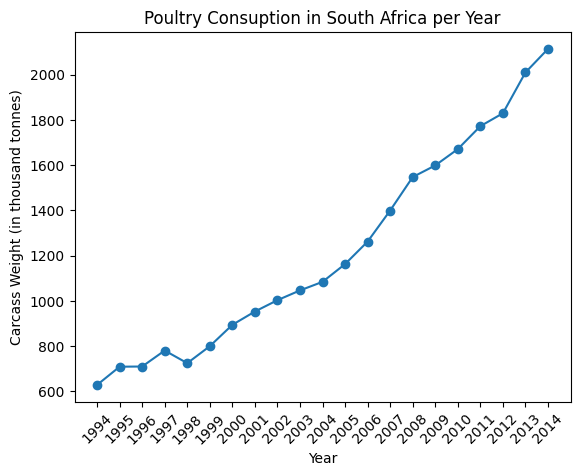

In [7]:
# create a plot that visualizes the number of events that happpen each year
plt.plot(df['TIME'], df['Value'], marker = 'o')

# have the x-axis display every year
plt.xticks(df['TIME'])
# rotate the years for readability
plt.xticks(rotation=45)

# give the plot a title
plt.title('Poultry Consuption in South Africa per Year')
# label the x axis
plt.xlabel('Year')
# label the y axis
plt.ylabel('Carcass Weight (in thousand tonnes)')

# show the line chart
plt.show()

### Commenting on the trend
By looking at the line chart, is it extemely evident that consuption trends upward over time. After the year 1998, the data for every year is greater than the year prior. In the most recent years, it appears that there have been more dramatic change increases than in the past.

## Question 6
(15 pts) Predict the poultry consumption for 2015 and 2016, using simple linear regression. Ensure that you visualize the original data and also include the predictions from the model.

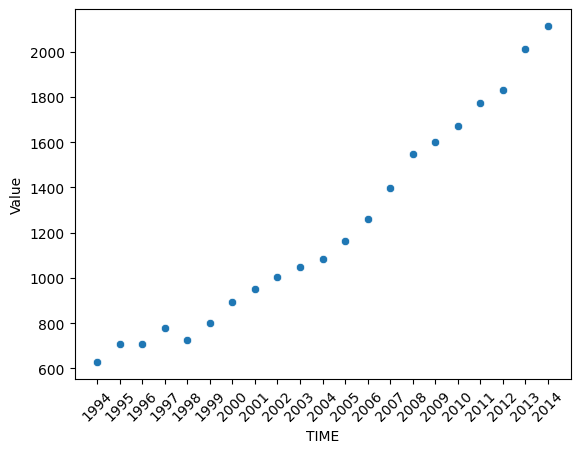

The intercept is: -146350.63
The slope is: 73.64
Prediction for 2015: 2034.06
Prediction for 2016: 2107.7


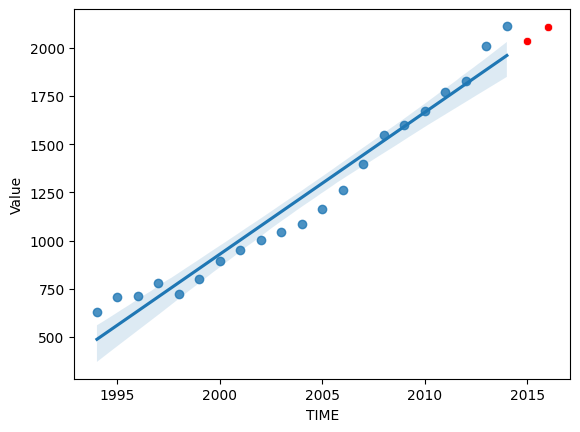

In [8]:
# create a scatterplot
sns.scatterplot(data=df, x='TIME', y='Value')

# customize the x-axis ticks for every year and rotate for readability
plt.xticks(df['TIME'])
plt.xticks(rotation=45)

# display the scatter plot
plt.show()

# prep data for linear regression
X = df['TIME'].to_numpy().reshape(-1, 1)
y = df['Value'].to_numpy()

# create and fit the linear regression model
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X, y)

# print the slope and intercept
print('The intercept is:', lr_model.intercept_.round(2))
print('The slope is:', lr_model.coef_[0].round(2))

# make predictions for consumption for the year 2015 and 2016
poultry_2015 = np.array([2015]).reshape(1, -1)
poultry_2016 = np.array([2016]).reshape(1, -1)

pred_2015 = lr_model.predict(poultry_2015)[0].round(2)
pred_2016 = lr_model.predict(poultry_2016)[0].round(2)

print('Prediction for 2015:', pred_2015)
print('Prediction for 2016:', pred_2016)

# create a regression plot with additonal predicted points
pred_plot = plt.figure()
sns.regplot(data=df, x='TIME', y='Value')
sns.scatterplot(x=[2015, 2016], y=[pred_2015, pred_2016], color='red')
plt.show()

### Predictions and Analysis
To recap, the predictions for 2015 and 2016 were calculated to be 2034.06 and 2107.7, respectively. This follows the linear regression line of best fit, as pictured in the chart above. The predicted red dots seem to fit in with the rest of the existing data from prior years.

## Question 7
(5 pts) Calculate the R-squared and explain what this tells you about the model.

In [9]:
# calculated r-squared
print("r-squared: ", lr_model.score(X,y).round(2))

r-squared:  0.96


### What this says about the model
Since the r-squared value is so close to 1, this means that the regression model has a large proportion of the variation in the dependent variable that is predictable from the independent variable. In other words, 96% of the variance of the dependent variable being studied is explained by the variance of the independent variable.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
